# Regression: Predicting the price of house on USA_Housing Dataset using Linear Regression, DecisionTreeRegressor and PassiveAggresiveRegressor
    *********************************************
    Adeyemi Adedoyin Simeon
    adeyemi.sa1@gmail.com
    209188
    MSc, Computer Science, Univ. of Ibadan
    29th April, 2019
    Version 1.1
    Modidified: 16th Sept., 2019
    *********************************************

In [74]:
# Importing some required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Loading the dataset
df = pd.read_csv('Datasets/USA_Housing.csv')

In [76]:
# Exploring the dataset
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [77]:
df.drop('Address',axis=1,inplace=True)

In [78]:
# Correlations
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [79]:
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


# Splitting the data into training and test set

In [80]:
X = df.drop('Price',axis=1)
y = df['Price']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Training the Model

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Using Linear Regression

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
lrPredicted = lm.predict(X_test)

## Using Decision Tree Regressor

In [87]:
dtr = DecisionTreeRegressor()

In [88]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [89]:
dtrPredicted = dtr.predict(X_test)

# Using Passive Agressive Regressor

In [90]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [91]:
par = PassiveAggressiveRegressor()

In [92]:
par.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


PassiveAggressiveRegressor(C=1.0, average=False, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, random_state=None, shuffle=True,
              tol=None, verbose=0, warm_start=False)

In [93]:
parPredicted = par.predict(X_test)

## Comparing the prediction Result of the three Models

In [94]:
df2 = pd.DataFrame(list(zip(y_test,lrPredicted,dtrPredicted,parPredicted)), 
                   columns=['Actual Price','Linear Regr Prediction','Decision Tree Prediction','Passive Aggressor Prediction'])

In [95]:
df2.head(10)

,Actual Price,Linear Regr Prediction,Decision Tree Prediction,Passive Aggressor Prediction
0,1.339096e+06,1.308500e+06,1.392537e+06,9.566551e+05
1,1.251794e+06,1.236863e+06,1.223101e+06,9.144292e+05
2,1.340095e+06,1.244411e+06,1.343163e+06,8.720704e+05
3,1.431508e+06,1.228858e+06,1.300031e+06,8.155023e+05
4,1.042374e+06,1.061128e+06,1.039333e+06,1.117037e+06
5,1.555321e+06,1.542833e+06,1.530068e+06,1.091156e+06
6,1.250882e+06,1.094261e+06,1.090789e+06,7.813946e+05
7,1.039381e+06,8.330931e+05,8.490087e+05,8.179923e+05
8,8.324752e+05,7.886513e+05,9.571176e+05,7.281688e+05
9,1.420648e+06,1.469140e+06,1.318681e+06,1.043498e+06


# Visualizing the result of the Three Models

Text(0,0.5,'Linear Regression Predicted Price')

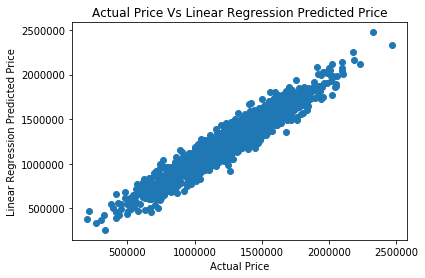

In [96]:
plt.scatter(df2['Actual Price'],df2['Linear Regr Prediction'])
plt.title('Actual Price Vs Linear Regression Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Linear Regression Predicted Price')

Text(0,0.5,'Decision Tree Predicted Price')

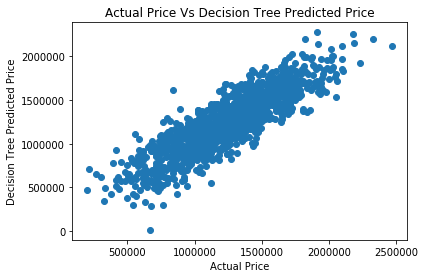

In [97]:
plt.scatter(df2['Actual Price'],df2['Decision Tree Prediction'])
plt.title('Actual Price Vs Decision Tree Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Decision Tree Predicted Price')

In [98]:
# Comments: Linear Regression Model did better than Decision Tree Regressor

Text(0,0.5,'Passive Aggressor Predicted Price')

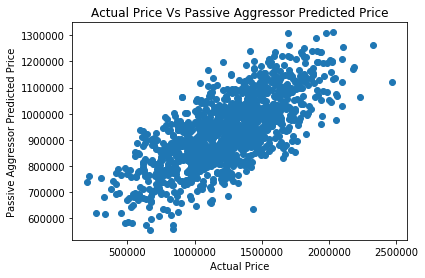

In [99]:
plt.scatter(df2['Actual Price'],df2['Passive Aggressor Prediction'])
plt.title('Actual Price Vs Passive Aggressor Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Passive Aggressor Predicted Price')

## Model Performance Evaluations

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [101]:
print("Linear Regression")
print("*****************")
print("Mean Absolute Error: ", mean_absolute_error(y_test,lrPredicted))
print("Mean Squared Error: ", mean_squared_error(y_test,lrPredicted))
print("Root Mean Squared Error: ", r2_score(y_test,lrPredicted))
print("\n")

print("Decision Tree Regressor")
print("***********************")
print("Mean Absolute Error: ", mean_absolute_error(y_test,dtrPredicted))
print("Mean Squared Error: ", mean_squared_error(y_test,dtrPredicted))
print("Root Mean Squared Error: ", r2_score(y_test,dtrPredicted))
print("\n")

print("Passive Aggressive Regressor")
print("****************************")
print("Mean Absolute Error: ", mean_absolute_error(y_test,parPredicted))
print("Mean Squared Error: ", mean_squared_error(y_test,parPredicted))
print("Root Mean Squared Error: ", r2_score(y_test,parPredicted))

Linear Regression
*****************
Mean Absolute Error:  80859.6254368794
Mean Squared Error:  9940956140.796736
Root Mean Squared Error:  0.9169678829262486


Decision Tree Regressor
***********************
Mean Absolute Error:  140434.4801716234
Mean Squared Error:  31796379897.87977
Root Mean Squared Error:  0.7344198384129849


Passive Aggressive Regressor
****************************
Mean Absolute Error:  340393.1560701023
Mean Squared Error:  166002243481.97766
Root Mean Squared Error:  -0.386538429511293
